This code is scraping a markdown file from a URL, extracting questions and answers using regular expressions, and saving them to a CSV file. The difficulty level of each question is determined based on the presence of certain emojis. The resulting CSV file will contain the questions, answers, and difficulty levels for use in other applications or analysis.

In [11]:
import requests
import csv
import re

# URL of the markdown file to scrape
url = 'https://raw.githubusercontent.com/alexeygrigorev/data-science-interviews/master/theory.md'

# Download the markdown file
response = requests.get(url)
markdown_text = response.text

# Create a list to store the questions and answers
qa_list = []

# Regular expression pattern to match questions and answers
qa_pattern = r'^\s*<br/>*\s*(.*?)\s*[\r\n]+(.+?)[\r\n]+'

# Iterate over each match in the markdown file
for match in re.finditer(qa_pattern, markdown_text, re.MULTILINE):
    # Extract the question and answer from the match
    question = match.group(1).strip()
    answer = match.group(2).strip()
    
    # Determine the difficulty level based on the emojis in the question
    if '👶' in question:
        difficulty = 'easy'
    elif '‍⭐️' in question:
        difficulty = 'medium'
    elif '🚀' in question:
        difficulty = 'expert'
    else:
        difficulty = ''
    
    # Remove the emojis and stars from the question
    question = re.sub(r'[👶**⭐️🚀*]', '', question).strip()
    
    # Add the question, answer, and difficulty level to the list
    qa_list.append((question, answer, difficulty))

# Write the list to a CSV file
with open('qa3_data.csv', 'w', newline='', encoding='utf-8') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(['Question', 'Answer', 'Difficulty'])
    writer.writerows(qa_list)


This code uses pandas library to read a CSV file, clean the data in the file, and then write the cleaned data to a new CSV file.

First, it reads in the 'qa3_data.csv' file and stores it in a dataframe. Then, it drops any rows with missing data using the dropna() function with the inplace=True argument to modify the existing dataframe.

Next, it removes any leading or trailing whitespace from the 'Question' and 'Answer' columns using the str.strip() function. It then removes any HTML tags from these columns using the str.replace() function with a regular expression pattern that matches any string starting with '<' and ending with '>'.

After this, it removes any unnecessary characters from the 'Question' and 'Answer' columns using the str.replace() function with another regular expression pattern. Finally, it removes any extra whitespace from the 'Question' and 'Answer' columns using the str.replace() function with the '\s+' pattern, which matches one or more whitespace characters.

The cleaned data is then written to a new CSV file named 'cleaned_qa_data.csv' using the to_csv() function with the index=False argument to not include the index column. The encoding argument is set to 'utf-8' to ensure compatibility with a wide range of systems.

In [12]:
import pandas as pd

# Read in the CSV file
df = pd.read_csv('qa3_data.csv')

# Drop any rows with missing data
df.dropna(inplace=True)

# Remove any leading or trailing whitespace in the Question and Answer columns
df['Question'] = df['Question'].str.strip()
df['Answer'] = df['Answer'].str.strip()

# Remove any HTML tags from the Question and Answer columns
df['Question'] = df['Question'].str.replace(r'<.*?>', '')
df['Answer'] = df['Answer'].str.replace(r'<.*?>', '')

# Remove any unnecessary characters from the Question and Answer columns
df['Question'] = df['Question'].str.replace(r'[“”"\']', '')
df['Answer'] = df['Answer'].str.replace(r'[“”"\']', '')

# Remove any extra whitespace from the Question and Answer columns
df['Question'] = df['Question'].str.replace(r'\s+', ' ')
df['Answer'] = df['Answer'].str.replace(r'\s+', ' ')

# Write the cleaned data to a new CSV file
df.to_csv('cleaned_qa_data.csv', index=False, encoding='utf-8')


<ipython-input-12-5a1db98ef8f2>:14: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Question'] = df['Question'].str.replace(r'<.*?>', '')
<ipython-input-12-5a1db98ef8f2>:15: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Answer'] = df['Answer'].str.replace(r'<.*?>', '')
<ipython-input-12-5a1db98ef8f2>:18: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Question'] = df['Question'].str.replace(r'[“”"\']', '')
<ipython-input-12-5a1db98ef8f2>:19: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Answer'] = df['Answer'].str.replace(r'[“”"\']', '')
<ipython-input-12-5a1db98ef8f2>:22: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Question'] = df['Question'].str.replace(r'\s+', ' ')
<ipython-input-12-5a1db98ef8f2>:23: FutureWarning: The 

This code loads a cleaned CSV file into a pandas DataFrame and then calculates the number of questions by difficulty level. It then creates a bar chart to visualize the results. Overall, this code is a good way to quickly analyze the distribution of question difficulty levels in the dataset. 

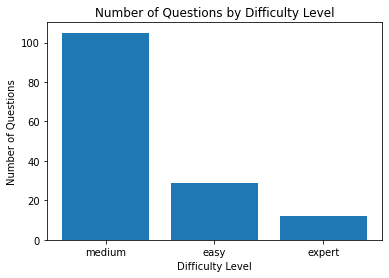

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('cleaned_qa_data.csv')

# Calculate the number of questions by difficulty level
counts = df['Difficulty'].value_counts()

# Create a bar chart to visualize the results
plt.bar(counts.index, counts.values)
plt.title('Number of Questions by Difficulty Level')
plt.xlabel('Difficulty Level')
plt.ylabel('Number of Questions')
plt.show()


This code reads the questions from a CSV file and creates a word cloud visualization of the most common words in the questions.

The csv module is used to read the questions from the CSV file. The WordCloud class from the wordcloud module is used to generate the word cloud, and the matplotlib.pyplot module is used to display the visualization.

The questions are concatenated into a single string, and then passed as input to the WordCloud object. The width, height, and background_color parameters are set to customize the appearance of the word cloud.

The imshow function from matplotlib.pyplot is used to display the word cloud. The interpolation parameter specifies the method used to interpolate between the pixels in the image. The axis function is used to remove the x and y axes from the plot. Finally, the show function is called to display the word cloud.






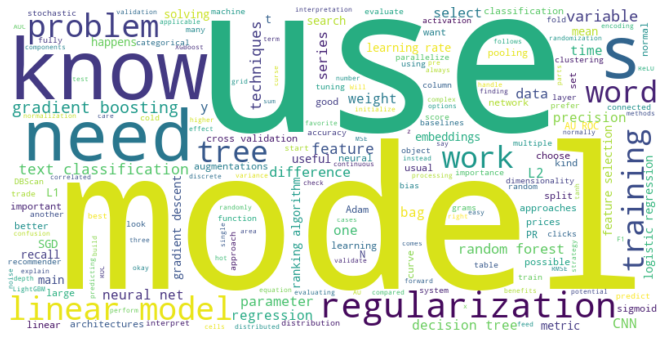

In [15]:
import csv
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Read the questions from the CSV file
with open('cleaned_qa_data.csv', newline='', encoding='utf-8') as csv_file:
    reader = csv.DictReader(csv_file)
    questions = [row['Question'] for row in reader]

# Concatenate all the questions into a single string
all_questions = ' '.join(questions)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_questions)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


This code reads in a CSV file containing cleaned question-answer pairs and creates a histogram of the lengths of the answer strings. The csv module is used to read in the data from the file, and the matplotlib library is used to create the histogram plot.

The with statement is used to open the file in a context manager to ensure that the file is properly closed after it has been read. The next(reader) function is called to skip the header row of the CSV file, which contains the column names.

The lengths of the answer strings are stored in a list called answer_lengths. This list is passed as the first argument to the plt.hist() function, which creates the histogram plot. The bins argument specifies the number of bins to use in the histogram.

The plt.xlabel(), plt.ylabel(), and plt.title() functions are used to set the labels and title of the plot. Finally, the plt.show() function is called to display the plot.

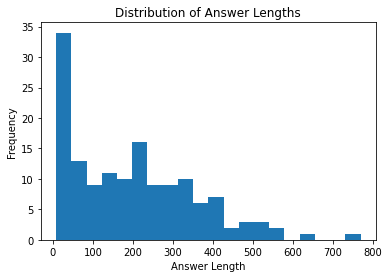

In [16]:
import csv
import matplotlib.pyplot as plt

# Open the CSV file and read the answers
with open('cleaned_qa_data.csv', newline='', encoding='utf-8') as csv_file:
    reader = csv.reader(csv_file)
    next(reader)  # skip the header row
    answer_lengths = [len(row[1]) for row in reader]

# Plot a histogram of the answer lengths
plt.hist(answer_lengths, bins=20)
plt.xlabel('Answer Length')
plt.ylabel('Frequency')
plt.title('Distribution of Answer Lengths')
plt.show()


This code loads the cleaned data from a CSV file into a pandas DataFrame, calculates the word count for each answer using a lambda function and creates a histogram to visualize the distribution of word counts.

The histogram is plotted using matplotlib.pyplot and the x-axis represents the word count and the y-axis represents the frequency of answers with that word count.

Overall, this code provides a good way to explore the length of answers in the data and identify any patterns or trends.

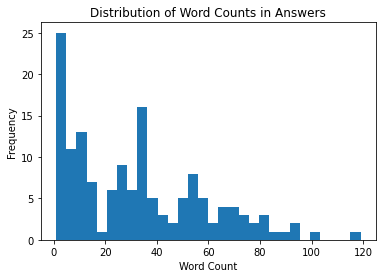

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('cleaned_qa_data.csv')

# Calculate the word count for each answer
df['Word Count'] = df['Answer'].apply(lambda x: len(x.split()))

# Create a histogram to visualize the distribution of word counts
plt.hist(df['Word Count'], bins=30)
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Distribution of Word Counts in Answers')
plt.show()


In [22]:
!pip install pyLDAvis


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 41.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 49.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6


The code seems to be using Gensim and pyLDAvis libraries to train an LDA model on the answers in the cleaned QA data. It first loads the data into a pandas DataFrame and then tokenizes the answers by removing stop words and unnecessary words. It then creates a dictionary and a corpus for the answers and trains an LDA model with 10 topics and 10 passes. Finally, it uses pyLDAvis to visualize the model.

In [29]:
import pandas as pd
import gensim
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import nltk
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

nltk.download('stopwords')

# Load the cleaned QA data
df = pd.read_csv('cleaned_qa_data.csv')

# Define the stop words and unnecessary words
stop_words = set(nltk.corpus.stopwords.words('english'))
unnecessary_words = set(['example', 'like', 'would', 'could', 'yes', 'done',])

# Tokenize the answers and remove stop words and unnecessary words
tokenized_answers = []
for answer in df['Answer']:
    tokens = gensim.utils.simple_preprocess(answer)
    tokens = [token for token in tokens if token not in stop_words and token not in unnecessary_words]
    tokenized_answers.append(tokens)

# Create a dictionary and corpus for the answers
dictionary = gensim.corpora.Dictionary(tokenized_answers)
corpus = [dictionary.doc2bow(answer) for answer in tokenized_answers]

# Train the LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=10, id2word=dictionary, passes=10)

# Visualize the model using pyLDAvis
vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


This code uses the pandas and seaborn libraries to create a heatmap that shows the average length of questions and answers for each difficulty level in the cleaned QA data.

First, the code loads the data from the CSV file using pd.read_csv. Then, it calculates the length of the questions and answers using the apply method on the relevant columns, and adds these as new columns to the DataFrame.

Next, the code uses the pd.pivot_table function to create a new DataFrame that has the average question and answer length for each difficulty level. The index parameter is set to 'Difficulty' to group the data by difficulty level, and the values parameter is set to a list of the columns to include in the table and aggregate by mean.

Finally, the code uses sns.heatmap to plot the table as a heatmap. The cmap parameter is set to 'coolwarm' to use a color scheme that ranges from blue to red, and annot=True and fmt='.2f' are used to display the values in each cell of the heatmap.

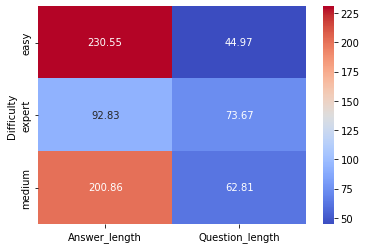

In [26]:
import pandas as pd
import seaborn as sns

# Load the cleaned QA data
df = pd.read_csv('cleaned_qa_data.csv')

# Calculate the length of the questions and answers
df['Question_length'] = df['Question'].apply(lambda x: len(x))
df['Answer_length'] = df['Answer'].apply(lambda x: len(x))

# Create a pivot table with the average question and answer length for each difficulty level
table = pd.pivot_table(df, index='Difficulty', values=['Question_length', 'Answer_length'], aggfunc='mean')

# Plot the heatmap
sns.heatmap(table, cmap='coolwarm', annot=True, fmt='.2f')
